## Prediction

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

In [128]:
data = pd.read_csv("Train1.0.csv", sep=',',index_col=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4250 entries, 0 to 4249
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 4250 non-null   int64  
 1   international_plan             4250 non-null   int64  
 2   number_vmail_messages          4250 non-null   int64  
 3   total_day_minutes              4250 non-null   float64
 4   total_day_calls                4250 non-null   int64  
 5   total_eve_minutes              4250 non-null   float64
 6   total_eve_calls                4250 non-null   int64  
 7   total_night_minutes            4250 non-null   float64
 8   total_night_calls              4250 non-null   int64  
 9   total_intl_minutes             4250 non-null   float64
 10  total_intl_calls               4250 non-null   int64  
 11  number_customer_service_calls  4250 non-null   int64  
 12  churn                          4250 non-null   int64 

In [129]:
X=data.drop('churn',axis=1)
y=data.churn

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
X_train.shape

(3400, 12)

In [132]:
X_test.shape

(850, 12)

#### Linear Regression

In [133]:
LR = LogisticRegression(max_iter=1000).fit(X_train,y_train)

In [134]:
LR.score(X_train,y_train)

0.8688235294117647

In [135]:
pd.DataFrame(dict(zip(X_train.columns,LR.coef_[0])),index=['coef_'])

,account_length,international_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls
coef_,0.001442,1.993348,-0.034959,0.014012,0.001758,0.00631,-0.001179,0.004019,-0.00167,0.074868,-0.059646,0.535178


In [136]:
cv_scores = cross_val_score(LR, X, y, cv=5)
cv_scores

array([0.86705882, 0.86235294, 0.86823529, 0.86705882, 0.86470588])

In [137]:
LR.score(X_test,y_test)

0.8647058823529412

In [138]:
y_score = LR.predict_proba(X_test)  # 随机森林
fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)
y_pred = LR.predict(X_test)
scores = [round(i(y_test, y_pred),3 )for  i in (accuracy_score,precision_score,\
                                     recall_score,f1_score)]
scores.insert(0,roc_auc)

In [139]:
metrics = pd.DataFrame([scores], columns=['auc', 'accuracy', 'precision', 'recall', 'f1'])
metrics

,auc,accuracy,precision,recall,f1
0,0.817028,0.865,0.652,0.233,0.343


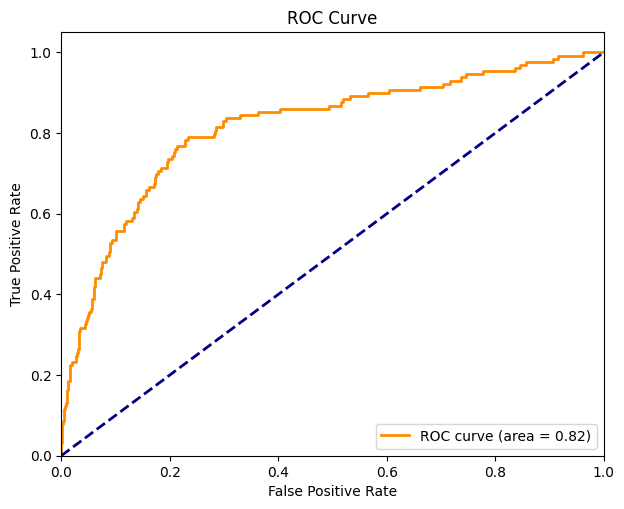

In [140]:
def drawRoc(roc_auc,fpr,tpr):
    plt.subplots(figsize=(7, 5.5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
drawRoc(roc_auc, fpr, tpr)

#### Random Forest 

In [141]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [142]:
clf.score(X_train,y_train)

1.0

In [143]:

cv_scores = cross_val_score(clf, X, y, cv=5)
cv_scores


array([0.94823529, 0.95647059, 0.95176471, 0.95411765, 0.96      ])

In [144]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9552941176470588